In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from datetime import datetime, date
import json
from xgrads import open_CtlDataset
import geopandas as gpd
import requests
import hydrofunctions as hf
import matplotlib.pyplot as plt
import folium 
%matplotlib inline

In [3]:
# Choose a domain
domain = 'BEAU'

# Path to the SnowModel folder
datapath = '/nfs/attic/dfh/2020_NPRB/domain_'+domain+'/model_runs/'
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'

#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

# get USGS station data

In [4]:
# get USGS stations in the state of alaska
alaska = hf.NWIS(None,'dv', domains[domain]['st'],domains[domain]['ed'],parameterCd='00060',stateCd='AK', file='Q.parquet')
alaska

Reading data from Q.parquet


USGS:15008000: SALMON R NR HYDER AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15009000: SOULE R NR HYDER AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15015595: UNUK R BL BLUE R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15019990: TYEE LK OUTLET NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15022000: HARDING R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15024800: STIKINE R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15028300: FARRAGUT R NR PETERSBURG AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15039900: DOROTHY LK OUTLET NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15040000: DOROTHY C NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15041200: TAKU R NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15049900: GOLD C NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet 

In [7]:
# build discharge dataframe
akQ = alaska.df('discharge')
akQ

,USGS:15008000:00060:00003,USGS:15009000:00060:00003,USGS:15015595:00060:00003,USGS:15019990:00060:00003,USGS:15022000:00060:00003,USGS:15024800:00060:00003,USGS:15028300:00060:00003,USGS:15039900:00060:00003,USGS:15040000:00060:00003,USGS:15041200:00060:00003,...,USGS:15862500:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15904800:00060:00003,USGS:15905100:00060:00003,USGS:15906000:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
1988-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,1070.0,71800.0,3570.0,185.0,NaN,15500.0,...,NaN,NaN,190.0,NaN,NaN,NaN,680.0,NaN,NaN,NaN
1988-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,797.0,58900.0,2580.0,159.0,NaN,14000.0,...,NaN,NaN,180.0,NaN,NaN,NaN,640.0,NaN,NaN,NaN
1988-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,730.0,54900.0,2380.0,154.0,NaN,13000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,600.0,NaN,NaN,NaN
1988-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,1170.0,61500.0,4330.0,232.0,NaN,15000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,580.0,NaN,NaN,NaN
1988-10-05 00:00:00+00:00,NaN,NaN,NaN,NaN,1630.0,83100.0,4280.0,306.0,NaN,16000.0,...,NaN,NaN,160.0,NaN,NaN,NaN,540.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,1550.0,NaN,5530.0,0.00,NaN,58300.0,NaN,NaN,NaN,8310.0,...,NaN,21700.0,2720.0,NaN,NaN,NaN,1450.0,NaN,NaN,209.0
2020-09-27 00:00:00+00:00,2370.0,NaN,9610.0,18.60,NaN,63700.0,NaN,NaN,NaN,9120.0,...,NaN,19800.0,2330.0,NaN,NaN,NaN,1320.0,NaN,NaN,199.0
2020-09-28 00:00:00+00:00,2230.0,NaN,13500.0,65.00,NaN,90600.0,NaN,NaN,NaN,15500.0,...,NaN,18400.0,1990.0,NaN,NaN,NaN,1260.0,NaN,NaN,192.0


In [8]:
#list of stations
fullstnlist = [val[5:13] for val in akQ.columns]

# get lat lon for each station and build dataframe of metadata
for i in range(len(fullstnlist)):
    stn = fullstnlist[i]
    if i ==0:
        dfs = hf.site_file(stn).table
    else:
        try:
            output = hf.site_file(stn).table
            dfs = pd.concat([dfs, output])
        except:
            continue
dfs

Retrieved the site file for site #15008000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15008000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15009000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15009000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15015595 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15015595&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15019990 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15019990&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15022000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15022000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15024800 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15024800&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15028300 from https://waterservices.usgs.gov/nwis/site

Retrieved the site file for site #15238500 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238500&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238600 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238600&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238648 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238648&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238820 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238820&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238978 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238978&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238982 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238982&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238984 from https://waterservices.usgs.gov/nwis/site

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,15008000,SALMON R NR HYDER AK,ST,560134.0,1300355.0,56.025815,-130.066982,M,R,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15009000,SOULE R NR HYDER AK,ST,555000.0,1301054.0,55.833029,-130.183369,M,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15015595,UNUK R BL BLUE R NR WRANGELL AK,ST,561426.0,1305249.0,56.240206,-130.881986,M,R,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15019990,TYEE LK OUTLET NR WRANGELL AK,ST,561200.0,1313024.0,56.199641,-131.508362,M,S,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15022000,HARDING R NR WRANGELL AK,ST,561248.0,1313812.0,56.212978,-131.638359,M,T,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,USGS,15906000,SAGAVANIRKTOK R TRIB NR PUMP STA 3 AK,ST,684113.0,1490542.0,68.686574,-149.097790,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15908000,SAGAVANIRKTOK R NR PUMP STA 3 AK,ST,690057.0,1484904.0,69.015833,-148.817778,N,5,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15955000,CANNING R AB STAINES R NR DEADHORSE AK,ST,695255.0,1462309.0,69.881705,-146.388699,G,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15960000,TAMAYARIAK R NR KAKTOVIK AK,ST,695155.0,1453534.0,69.865056,-145.595592,G,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# turn dataframe into geodataframe
gdfs = gpd.GeoDataFrame(dfs,geometry=gpd.points_from_xy(dfs.dec_long_va, dfs.dec_lat_va),crs='epsg:4326')
gdfs

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15008000,SALMON R NR HYDER AK,ST,560134.0,1300355.0,56.025815,-130.066982,M,R,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.06698 56.02582)
0,USGS,15009000,SOULE R NR HYDER AK,ST,555000.0,1301054.0,55.833029,-130.183369,M,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.18337 55.83303)
0,USGS,15015595,UNUK R BL BLUE R NR WRANGELL AK,ST,561426.0,1305249.0,56.240206,-130.881986,M,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.88199 56.24021)
0,USGS,15019990,TYEE LK OUTLET NR WRANGELL AK,ST,561200.0,1313024.0,56.199641,-131.508362,M,S,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-131.50836 56.19964)
0,USGS,15022000,HARDING R NR WRANGELL AK,ST,561248.0,1313812.0,56.212978,-131.638359,M,T,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-131.63836 56.21298)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,USGS,15906000,SAGAVANIRKTOK R TRIB NR PUMP STA 3 AK,ST,684113.0,1490542.0,68.686574,-149.097790,M,U,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-149.09779 68.68657)
0,USGS,15908000,SAGAVANIRKTOK R NR PUMP STA 3 AK,ST,690057.0,1484904.0,69.015833,-148.817778,N,5,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-148.81778 69.01583)
0,USGS,15955000,CANNING R AB STAINES R NR DEADHORSE AK,ST,695255.0,1462309.0,69.881705,-146.388699,G,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-146.38870 69.88171)
0,USGS,15960000,TAMAYARIAK R NR KAKTOVIK AK,ST,695155.0,1453534.0,69.865056,-145.595592,G,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-145.59559 69.86506)


<AxesSubplot:>

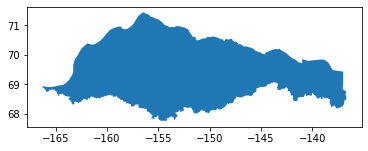

In [10]:
# open shapefile of interest basin
h2sdpath = '/nfs/attic/dfh/2020_NPRB/data/gis/'+domain+'/'+domain+'.json'
domgdf = gpd.read_file(h2sdpath)
domgdf.plot()

In [11]:
#index of stations that fall into in the domain
mask = gdfs.within(domgdf.loc[0].geometry) 
mask

0    False
0    False
0    False
0    False
0    False
     ...  
0     True
0     True
0     True
0     True
0     True
Length: 279, dtype: bool

In [12]:
#gdf of stns in the domain
instn = gdfs.loc[mask]
instn = instn.reset_index(drop=True)
# project gdf to model coordinates
stnproj=instn.to_crs(domains[domain]['mod_proj'])
stnproj = stnproj.reset_index(drop=True)

stnproj

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15798700,NUNAVAK C NR BARROW AK,ST,711535.00,1564657.00,71.259303,-156.785972,M,U,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-102394.432 2364619.819)
1,USGS,15803000,MEADE R AT ATKASUK AK,ST,702945.00,1572333.00,70.495376,-157.395848,M,S,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-129053.158 2282397.475)
2,USGS,15820000,IKPIKPUK R BL FRY C NR ALAKTAK AK,ST,694600.50,1543940.60,69.766390,-154.664406,N,1,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-26059.586 2199320.070)
3,USGS,15860000,FISH C NR NUIQSUT AK,ST,701614.00,1515209.00,70.270199,-151.872308,N,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (81670.125 2255756.841)
4,USGS,15861000,JUDY C NR NUIQSUT AK,ST,701314.00,1515005.00,70.220199,-151.837848,N,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (83170.671 2250324.988)
5,USGS,15862500,UBLUTUOCH R 13.7 MI AB MOUTH NR NUIQSUT AK,ST,701433.56,1511741.81,70.242656,-151.294947,G,F,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (103943.670 2253548.499)
6,USGS,15875000,COLVILLE R AT UMIAT AK,ST,692137.80,1520721.70,69.360500,-152.122694,Y,D,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (74884.972 2155626.519)
7,USGS,15896000,KUPARUK R NR DEADHORSE AK,ST,701654.00,1485735.00,70.281385,-148.962786,M,T,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (193105.171 2263000.626)
8,USGS,15904800,ATIGUN R NR PUMP STATION 4 AK,ST,681254.00,1492413.00,68.214613,-149.406411,M,F,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (191851.249 2034798.385)
9,USGS,15905100,ATIGUN R BL GALBRAITH LK NR PUMP STATION 4 AK,ST,682708.00,1492224.00,68.452222,-149.373333,Y,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (191402.544 2061090.423)


In [19]:
# save domain discharge data for later use
# list of column names for stations in domain
stnQlist = ['USGS:'+val+':00060:00003' for val in instn.site_no.to_list()]
# dataframe of Q across domain
indf = akQ[akQ.columns.intersection(stnQlist)]
path = gagepath+domain+'_discharge_cfs.csv'
indf.to_csv(path)

In [14]:
# save metadata
path=gagepath+domain+'_gage_meta.geojson'
instn.to_file(path, driver='GeoJSON')  
path=gagepath+domain+'_gage_meta_proj.geojson'
stnproj.to_file(path, driver='GeoJSON') 

/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
